In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [270]:
data = pd.read_csv("churn_prediction.csv")

In [271]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [272]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [273]:
data[["gender","dependents","occupation","city","days_since_last_transaction"]].head()

,gender,dependents,occupation,city,days_since_last_transaction
0,Male,0.0,self_employed,187.0,224.0
1,Male,0.0,self_employed,NaN,60.0
2,Male,0.0,salaried,146.0,NaN
3,NaN,NaN,self_employed,1020.0,147.0
4,Male,2.0,self_employed,1494.0,58.0


In [274]:
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [275]:
data["gender"].fillna("Male", inplace=True)

In [276]:
data["occupation"].value_counts()/len(data)*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

In [277]:
data["occupation"].fillna("self_employed", inplace=True)

In [278]:
data["dependents"].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [279]:
data["dependents"].fillna("0.0", inplace=True)

In [280]:
data["city"].value_counts()/len(data)*100

1020.0    12.257769
1096.0     7.103094
409.0      4.700162
146.0      4.548658
834.0      4.009584
            ...    
629.0      0.003523
527.0      0.003523
1212.0     0.003523
530.0      0.003523
70.0       0.003523
Name: city, Length: 1604, dtype: float64

Text(0.5, 0, 'cities')

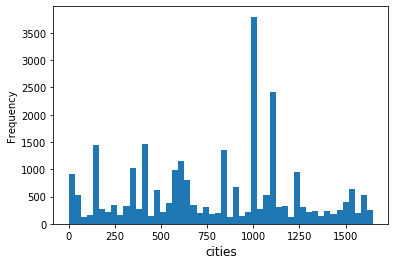

In [281]:
data['city'].plot.hist(bins = 50)
plt.xlabel('cities', fontsize=12)

In [282]:
data["city"].fillna("1020.0", inplace=True)

In [283]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [284]:
data["city"].value_counts()/len(data)*100


1020.0    12.257769
1096.0     7.103094
409.0      4.700162
146.0      4.548658
834.0      4.009584
            ...    
1098.0     0.003523
1099.0     0.003523
1101.0     0.003523
1102.0     0.003523
798.0      0.003523
Name: city, Length: 1605, dtype: float64

In [285]:
data["days_since_last_transaction"].value_counts()/len(data)*100

0.0      5.891058
3.0      2.927912
14.0     2.304277
4.0      2.226763
6.0      2.099922
           ...   
170.0    0.003523
218.0    0.003523
334.0    0.003523
288.0    0.003523
321.0    0.003523
Name: days_since_last_transaction, Length: 360, dtype: float64

In [286]:
data["days_since_last_transaction"].fillna("0.0" , inplace = True)

In [287]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [288]:
data["days_since_last_transaction"].value_counts()/len(data)*100

0.0      11.355789
0.0       5.891058
3.0       2.927912
14.0      2.304277
4.0       2.226763
           ...    
225.0     0.003523
351.0     0.003523
321.0     0.003523
134.0     0.003523
92.0      0.003523
Name: days_since_last_transaction, Length: 361, dtype: float64

In [289]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [290]:
#TRAIN TEST SPLIT

In [291]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0,self_employed,187,2,755,224,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0,self_employed,1020.0,2,3214,60,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0,salaried,146,2,41,0.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020,2,582,147,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2,self_employed,1494,3,388,58,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [292]:
x = data.drop(['churn'],axis=1)
y = data['churn']

In [293]:
x

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,Male,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2,310,35,Male,0,self_employed,1020.0,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,4,2356,31,Male,0,salaried,146,2,41,0.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,5,478,90,Male,0.0,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,6,2531,42,Male,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0,student,1020,2,1207,70,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43
28378,30298,4919,34,Female,0,self_employed,1046,2,223,14,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32
28379,30299,297,47,Male,0,salaried,1096,2,588,0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24
28380,30300,2585,50,Male,3,self_employed,1219,3,274,0.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55


In [294]:
y


0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [296]:
train_x


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
4310,4593,2648,66,Male,0,self_employed,1437,2,1063,3,8374.31,7560.72,8161.37,7636.13,173.37,52.87,0.63,1675.60,7996.42,8034.65
8408,8960,2004,90,Male,0,self_employed,1020,2,1451,171,2110.91,2110.91,2110.91,2097.40,0.64,0.64,0.64,0.64,2110.91,2110.91
13809,14738,4690,55,Female,0,self_employed,1020,1,212,6,334487.08,2931.75,23482.49,4439.41,10000.20,0.20,98.01,0.20,53616.95,2889.52
13602,14519,5333,49,Male,0,salaried,834,2,14,0,1751.28,4813.89,5883.83,4307.13,15842.53,1753.36,17702.43,974.96,7691.78,4056.30
8692,9268,4287,58,Male,0,self_employed,459,3,2304,33,471.79,3858.98,4167.30,2484.31,0.54,21571.97,3316.30,10027.50,1625.00,3931.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,11709,521,90,Male,0.0,self_employed,1341,2,2688,11,828201.44,828191.67,595422.52,381539.20,9.84,441798.76,0.07,0.07,828195.71,571669.08
17289,18447,812,33,Male,0,self_employed,1247,3,2547,89,1582.59,3296.95,4312.86,1811.81,0.24,0.24,428.81,1785.96,2691.03,3573.87
5192,5528,4697,31,Female,0,self_employed,146,2,75,0,3050.23,3754.06,8753.57,16067.43,1504.30,4544.30,6214.53,14285.96,5531.83,6549.71
12172,12994,1412,28,Male,3,self_employed,931,3,2305,28,5610.72,5158.96,4523.75,2937.85,286.40,1957.83,8.38,72.11,5576.50,4475.13


In [297]:
valid_x

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
482,514,608,48,Male,0.0,self_employed,1020.0,2,1578,12,2578.21,1248.23,1898.52,3343.36,3331.39,526.83,2001.40,214.97,2312.02,1193.71
8018,8545,4379,90,Male,0,self_employed,1315,2,250,3,59750.65,9061.34,32868.47,47301.47,136451.47,1737.16,57669.03,0.50,48454.43,13670.55
25836,27584,984,43,Male,0,salaried,1232,2,2523,188,4861.64,5357.47,6333.78,7339.07,0.16,0.16,577.01,391.05,5151.80,6643.22
7379,7862,3231,64,Male,0,self_employed,245,2,204,18,5802.95,3002.66,3523.66,1855.14,2800.83,0.54,0.54,0.54,5175.33,3002.66
242,264,2339,64,Male,2,retired,334,2,674,60,5003.27,5020.15,3591.72,2344.87,0.26,0.26,163.30,239.05,5021.39,3386.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17414,18580,701,49,Male,0.0,salaried,1020,3,79,68,4568.00,4568.00,4584.90,5037.73,0.51,0.51,0.51,0.51,4568.00,4568.00
21228,22646,1320,73,Male,0,self_employed,1084,1,830,12,7361.93,7329.84,7334.25,4456.98,32.73,0.64,0.64,0.64,7344.22,7329.84
6964,7419,545,56,Male,0,self_employed,980,2,655,126,2152.18,4213.12,4513.54,6729.95,0.09,0.09,2063.29,1598.47,2292.60,5146.86
7540,8027,1107,45,Male,1,self_employed,334,3,493,21,149.71,3090.88,1465.95,1187.48,500.14,0.14,3441.31,70.14,1803.51,1441.47


In [298]:
valid_y

482      0
8018     1
25836    0
7379     0
242      0
        ..
17414    0
21228    0
6964     1
7540     0
9296     0
Name: churn, Length: 8515, dtype: int64

In [299]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                               object
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction        object
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [300]:
categorical_cols = ["gender","dependents","occupation","city","days_since_last_transaction"]

for i in categorical_cols:
    print('*****', i, '*****')
    print(data[i].value_counts())
    print('')

***** gender *****
Male      17073
Female    11309
Name: gender, dtype: int64

***** dependents *****
0.0     21435
0.0      2463
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
52.0        1
50.0        1
36.0        1
32.0        1
25.0        1
9.0         1
8.0         1
Name: dependents, dtype: int64

***** occupation *****
self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

***** city *****
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
1098.0       1
1099.0       1
1101.0       1
1102.0       1
798.0        1
Name: city, Length: 1605, dtype: int64

***** days_since_last_transaction *****
0.0      3223
0.0      1672
3.0       831
14.0      654
4.0       632
         ... 
225.0       1
351.0       1
321.0       1
134.0       1
92.0        1
Name: days_since_last_transaction, Length: 361, dtype: i

In [301]:
data = pd.get_dummies(data)

In [302]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
customer_nw_category                 int64
branch_code                          int64
                                     ...  
days_since_last_transaction_362.0    uint8
days_since_last_transaction_363.0    uint8
days_since_last_transaction_364.0    uint8
days_since_last_transaction_365.0    uint8
days_since_last_transaction_0.0      uint8
Length: 2005, dtype: object

In [303]:
data.head()

,customer_id,vintage,age,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,days_since_last_transaction_356.0,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_0.0
0,1,3135,66,2,755,1458.71,1458.71,1458.71,1449.07,0.20,...,0,0,0,0,0,0,0,0,0,0
1,2,310,35,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,...,0,0,0,0,0,0,0,0,0,0
2,4,2356,31,2,41,3913.16,5815.29,4910.17,2815.94,0.61,...,0,0,0,0,0,0,0,0,0,1
3,5,478,90,2,582,2291.91,2291.91,2084.54,1006.54,0.47,...,0,0,0,0,0,0,0,0,0,0
4,6,2531,42,3,388,927.72,1401.72,1643.31,1871.12,0.33,...,0,0,0,0,0,0,0,0,0,0


In [304]:
data.head()

,customer_id,vintage,age,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,days_since_last_transaction_356.0,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_0.0
0,1,3135,66,2,755,1458.71,1458.71,1458.71,1449.07,0.20,...,0,0,0,0,0,0,0,0,0,0
1,2,310,35,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,...,0,0,0,0,0,0,0,0,0,0
2,4,2356,31,2,41,3913.16,5815.29,4910.17,2815.94,0.61,...,0,0,0,0,0,0,0,0,0,1
3,5,478,90,2,582,2291.91,2291.91,2084.54,1006.54,0.47,...,0,0,0,0,0,0,0,0,0,0
4,6,2531,42,3,388,927.72,1401.72,1643.31,1871.12,0.33,...,0,0,0,0,0,0,0,0,0,0


In [305]:
x = data.drop(['churn'],axis=1)
y = data['churn']

In [306]:
x


,customer_id,vintage,age,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,days_since_last_transaction_356.0,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_0.0
0,1,3135,66,2,755,1458.71,1458.71,1458.71,1449.07,0.20,...,0,0,0,0,0,0,0,0,0,0
1,2,310,35,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,...,0,0,0,0,0,0,0,0,0,0
2,4,2356,31,2,41,3913.16,5815.29,4910.17,2815.94,0.61,...,0,0,0,0,0,0,0,0,0,1
3,5,478,90,2,582,2291.91,2291.91,2084.54,1006.54,0.47,...,0,0,0,0,0,0,0,0,0,0
4,6,2531,42,3,388,927.72,1401.72,1643.31,1871.12,0.33,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,...,0,0,0,0,0,0,0,0,0,0
28378,30298,4919,34,2,223,3844.10,4069.21,3668.83,3865.55,1.71,...,0,0,0,0,0,0,0,0,0,0
28379,30299,297,47,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,...,0,0,0,0,0,0,0,0,0,0
28380,30300,2585,50,3,274,1625.55,1625.55,1683.20,1857.42,0.20,...,0,0,0,0,0,0,0,0,0,1


In [307]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [308]:
train_x


,customer_id,vintage,age,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,days_since_last_transaction_356.0,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_0.0
4310,4593,2648,66,2,1063,8374.31,7560.72,8161.37,7636.13,173.37,...,0,0,0,0,0,0,0,0,0,0
8408,8960,2004,90,2,1451,2110.91,2110.91,2110.91,2097.40,0.64,...,0,0,0,0,0,0,0,0,0,0
13809,14738,4690,55,1,212,334487.08,2931.75,23482.49,4439.41,10000.20,...,0,0,0,0,0,0,0,0,0,0
13602,14519,5333,49,2,14,1751.28,4813.89,5883.83,4307.13,15842.53,...,0,0,0,0,0,0,0,0,0,0
8692,9268,4287,58,3,2304,471.79,3858.98,4167.30,2484.31,0.54,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,11709,521,90,2,2688,828201.44,828191.67,595422.52,381539.20,9.84,...,0,0,0,0,0,0,0,0,0,0
17289,18447,812,33,3,2547,1582.59,3296.95,4312.86,1811.81,0.24,...,0,0,0,0,0,0,0,0,0,0
5192,5528,4697,31,2,75,3050.23,3754.06,8753.57,16067.43,1504.30,...,0,0,0,0,0,0,0,0,0,0
12172,12994,1412,28,3,2305,5610.72,5158.96,4523.75,2937.85,286.40,...,0,0,0,0,0,0,0,0,0,0


In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [310]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

/home/yuvraj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
pred_train = logreg.predict_proba(train_x)
pred_valid = logreg.predict_proba(valid_x)

In [312]:
roc_auc_score(train_y, pred_train[:,1])

0.7061884087777959

In [313]:
roc_auc_score(valid_y, pred_valid[:,1])

0.7072095182998789

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=2)

In [315]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [316]:
pred_train_rf = rf.predict_proba(train_x)
pred_valid_rf = rf.predict_proba(valid_x)

In [317]:
roc_auc_score(train_y, pred_train_rf[:,1])*100

80.85840927501874

In [318]:
roc_auc_score(valid_y, pred_valid_rf[:,1])*100

78.74169139073607

In [323]:
pred_valid

array([[6.84076033e-01, 3.15923967e-01],
       [9.99441691e-01, 5.58309489e-04],
       [8.35009430e-01, 1.64990570e-01],
       ...,
       [5.73242999e-01, 4.26757001e-01],
       [6.15555823e-01, 3.84444177e-01],
       [7.10988157e-01, 2.89011843e-01]])

In [324]:
valid_y

482      0
8018     1
25836    0
7379     0
242      0
        ..
17414    0
21228    0
6964     1
7540     0
9296     0
Name: churn, Length: 8515, dtype: int64